
torch → Deep learning framework

torchvision → Provides MNIST dataset & transforms

matplotlib → For visualizing images and results

In [ ]:
pip install torch torchvision matplotlib

Step 2 — Import Dependencies

torch and nn → Build neural network

datasets, transforms → Get and preprocess MNIST data

DataLoader → Handle batching

matplotlib → Plot sample images

import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Step 3 — Load the MNIST Dataset

# Transform: convert image to Tensor
transform = transforms.ToTensor()

# Training data
train_dataset = datasets.MNIST(
    root="data",
    train=True,
    transform=transform,
    download=True
)

# Test data
test_dataset = datasets.MNIST(
    root="data",
    train=False,
    transform=transform,
    download=True
)

# Loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")

📝 DataLoader makes training efficient by feeding the model mini-batches instead of one image at a time.

👀 Step 4 — Visualize Some Samples (Optional)

images, labels = next(iter(train_loader))

# Plot first 6 images
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

This helps to see what the network is learning.

🧠 Step 5 — Define the Neural Network

class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)  # input -> hidden
        self.fc2 = nn.Linear(128, 64)     # hidden -> hidden
        self.fc3 = nn.Linear(64, 10)      # hidden -> output
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)  # final output (no softmax needed here)
        return x

model = NeuralNet()
print(model)

🔸 Network Architecture

Flatten Layer: converts 28×28 image → 784 vector

fc1: 784 → 128 neurons

fc2: 128 → 64 neurons

fc3: 64 → 10 output neurons (0–9 digits)

ReLU: activation after each layer (except last)

⚙️ Step 6 — Define Loss Function & Optimizer

# CrossEntropyLoss = good for classification
loss_fn = nn.CrossEntropyLoss()

# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

CrossEntropyLoss combines Softmax + LogLoss.
Adam optimizer adjusts weights efficiently.

🚀 Step 7 — Train the Model

epochs = 5

for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

📊 What happens here:

Forward pass → predictions from model

Compute loss → how far predictions are

Backward pass → gradient calculation

Optimizer step → weight update

🧪 Step 8 — Evaluate Model on Test Data

correct = 0
total = 0

with torch.no_grad():  # no gradient calculation needed
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # index of max logit = class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Typical accuracy with this model: ~97% on MNIST 🏆

In [ ]:
🧪 Step 9 — Test on a Single Image

import random

idx = random.randint(0, len(test_dataset)-1)
img, label = test_dataset[idx]

# Model prediction
with torch.no_grad():
    output = model(img.unsqueeze(0))  # add batch dimension
    pred = output.argmax(1).item()

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {pred}, Actual: {label}")
plt.axis('off')
plt.show()

📝 unsqueeze(0) adds a batch dimension to test a single image.

📚 Step 10 — Summary

✅ What this code covers:

    ✅ Dataset handling

    ✅ Building a feedforward neural network

    ✅ Training with loss and optimizer

    ✅ Accuracy evaluation

    ✅ Prediction visualization

🧑‍💻 Try These Exercises:

    Increase hidden layer size (e.g., 512 neurons).

    Change activation to nn.Tanh() or nn.Sigmoid().

    Increase epochs from 5 → 20.

    Add a nn.Dropout() layer to avoid overfitting.

    Plot training loss per epoch.

100%|██████████| 9.91M/9.91M [00:06<00:00, 1.63MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 942kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 797kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 904kB/s]


Train size: 60000, Test size: 10000


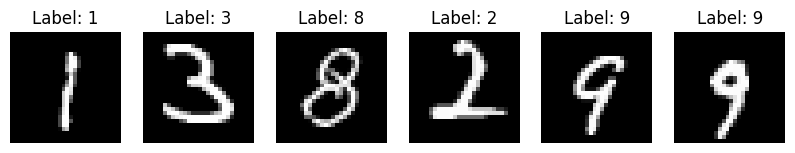

NeuralNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)
Epoch [1/5] - Loss: 0.3473
Epoch [2/5] - Loss: 0.1445
Epoch [3/5] - Loss: 0.0990
Epoch [4/5] - Loss: 0.0764
Epoch [5/5] - Loss: 0.0574
Test Accuracy: 97.55%


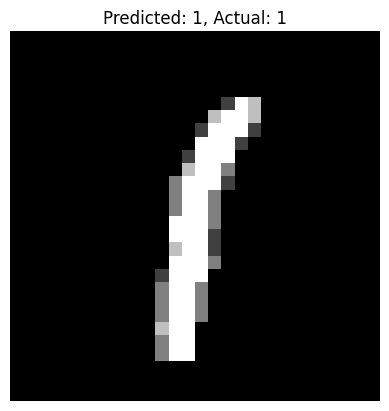

In [3]:
import torch
from torch import nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

# ========================
# STEP 1: Load MNIST Data
# ========================
transform = transforms.ToTensor()

train_dataset = datasets.MNIST(
    root="data",
    train=True,
    transform=transform,
    download=True
)
test_dataset = datasets.MNIST(
    root="data",
    train=False,
    transform=transform,
    download=True
)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Train size: {len(train_dataset)}, Test size: {len(test_dataset)}")

# ========================
# STEP 2: Visualize Samples
# ========================
images, labels = next(iter(train_loader))
plt.figure(figsize=(10,2))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

# ========================
# STEP 3: Define Neural Network
# ========================
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNet()
print(model)

# ========================
# STEP 4: Loss and Optimizer
# ========================
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# ========================
# STEP 5: Training Loop
# ========================
epochs = 5
for epoch in range(epochs):
    total_loss = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{epochs}] - Loss: {avg_loss:.4f}")

# ========================
# STEP 6: Evaluation
# ========================
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

# ========================
# STEP 7: Test on Single Image
# ========================
idx = random.randint(0, len(test_dataset)-1)
img, label = test_dataset[idx]
with torch.no_grad():
    output = model(img.unsqueeze(0))
    pred = output.argmax(1).item()

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"Predicted: {pred}, Actual: {label}")
plt.axis('off')
plt.show()